EDA

Our main objective is to answer key questions to the development of the predictive model:

1) How the deforestation process evolve with time?

2) How big should be the network input and the filters?

In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import geopandas as gpd
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from shapely.geometry import box

import config
from utils import compute_frames

In [2]:
# load legal amazon limits
am_bounds = gpd.read_file(config.AMAZON_FRONTIER_DATA)

In [3]:
# load frames idx detail
frames_idx = pd.read_csv(config.TR_FRAMES_IDX, index_col=0)

In [4]:
# load frames deforestation area history
deforestation = pd.read_csv(config.TR_DEFORESTATION, index_col=0)
deforestation["quarter_date"] = pd.to_datetime(deforestation["quarter_date"])

# How the deforestation process evolve with time?

We have quaterly deforestation data. It would be interesting to understand the deforestation time evolution on diferent geographical spots.

## Total amazon area

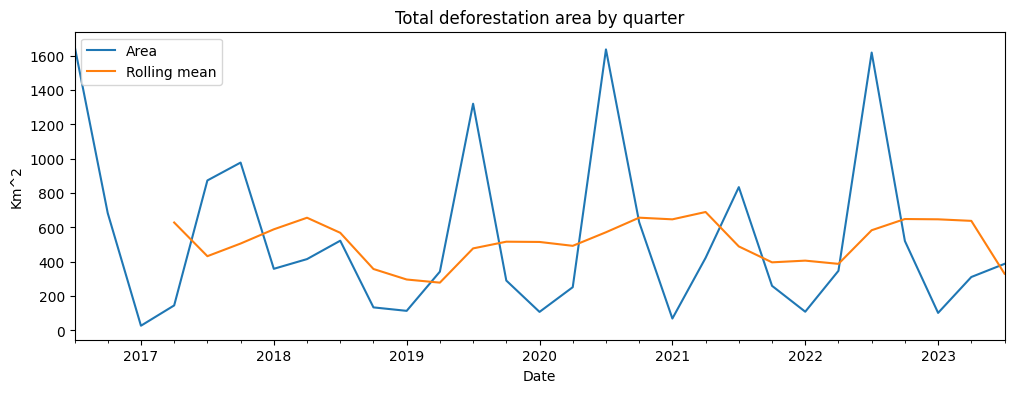

In [6]:
s = deforestation.groupby("quarter_date")["area"].sum().rename("Area")
ax = s.plot(figsize=(12, 4))
s.rolling(4).mean().plot(label="Rolling mean")
ax.set_title("Total deforestation area by quarter")
ax.set_xlabel("Date")
ax.set_ylabel("Km^2")
plt.legend()
plt.show()

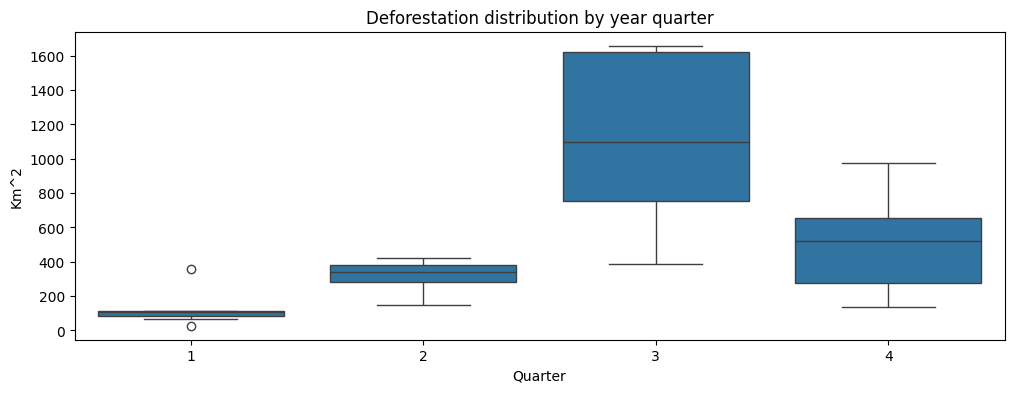

In [7]:
temp = deforestation.groupby("quarter_date")["area"].sum().reset_index()
fig, ax = plt.subplots(figsize=(12, 4))
sns.boxplot(
    x=temp["quarter_date"].dt.quarter,
    y=temp["area"],
    color=sns.color_palette()[0]
)
ax.set_title("Deforestation distribution by year quarter")
ax.set_xlabel("Quarter")
ax.set_ylabel("Km^2")
plt.show()

## By regions

In [19]:
# region 1
region1 = compute_frames(
    am_bounds.total_bounds, 
    config.BOX_SIDE, 
    40*3, 90*3, 
    90*3, 140*3
)

In [20]:
# region 2
region2 = compute_frames(
    am_bounds.total_bounds, 
    config.BOX_SIDE, 
    120*3, 170*3, 
    130*3, 180*3
)

In [21]:
# region 3
region3 = compute_frames(
    am_bounds.total_bounds, 
    config.BOX_SIDE, 
    220*3, 270*3, 
    110*3, 160*3
)

In [22]:
# region 4
region4 = compute_frames(
    am_bounds.total_bounds, 
    config.BOX_SIDE, 
    140*3, 190*3, 
    30*3, 80*3
)

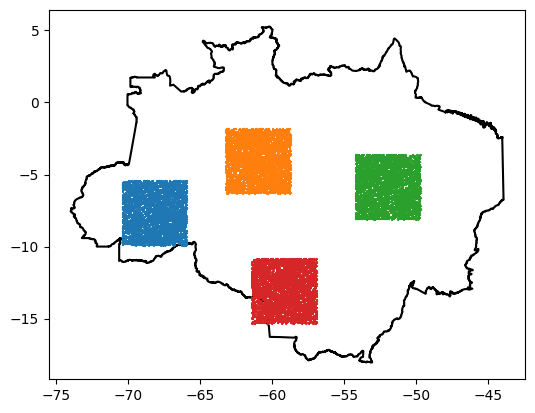

In [23]:
fig, ax = plt.subplots()
am_bounds.boundary.plot(ax=ax, color="black")
region1.sample(frac=0.2).boundary.plot(ax=ax, color=sns.color_palette()[0])
region2.sample(frac=0.2).boundary.plot(ax=ax, color=sns.color_palette()[1])
region3.sample(frac=0.2).boundary.plot(ax=ax, color=sns.color_palette()[2])
region4.sample(frac=0.2).boundary.plot(ax=ax, color=sns.color_palette()[3])
plt.show()

- unificar gráfico

c:\Users\GiovanniAmorim\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GiovanniAmorim\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GiovanniAmorim\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\GiovanniAmorim\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:111

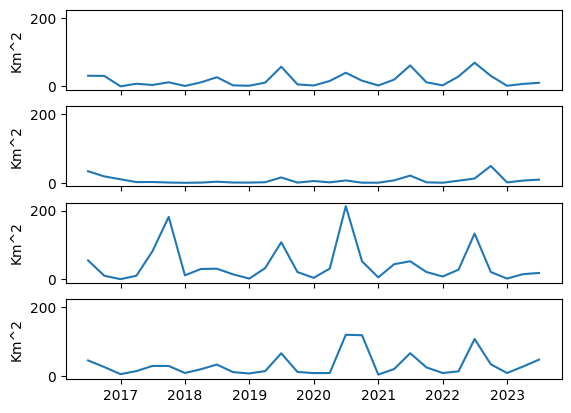

In [24]:
fig, ax = plt.subplots(4, sharex=True, sharey=True)
sns.lineplot(deforestation[deforestation["frame_id"].isin(region1["frame_id"].unique())].groupby("quarter_date")["area"].sum(), ax=ax[0])
sns.lineplot(deforestation[deforestation["frame_id"].isin(region2["frame_id"].unique())].groupby("quarter_date")["area"].sum(), ax=ax[1])
sns.lineplot(deforestation[deforestation["frame_id"].isin(region3["frame_id"].unique())].groupby("quarter_date")["area"].sum(), ax=ax[2])
sns.lineplot(deforestation[deforestation["frame_id"].isin(region4["frame_id"].unique())].groupby("quarter_date")["area"].sum(), ax=ax[3])

for ax_ in ax:
    ax_.set_ylabel("Km^2")

ax[-1].set_xlabel("")
plt.show()

c:\Users\GiovanniAmorim\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GiovanniAmorim\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GiovanniAmorim\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GiovanniAmorim\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureW

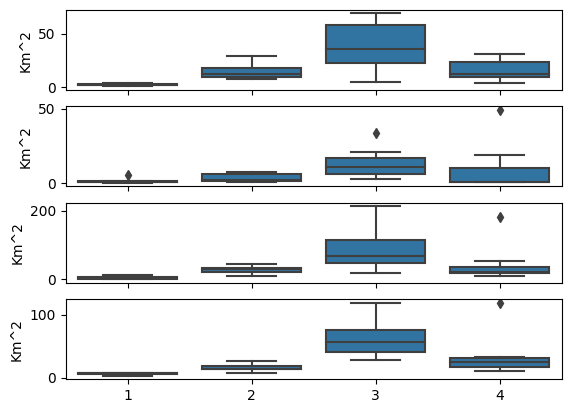

In [25]:
fig, ax = plt.subplots(4, sharex=True)

for i, region in enumerate([region1, region2, region3, region4]):
    temp = deforestation[deforestation["frame_id"].isin(region["frame_id"].unique())].groupby("quarter_date")["area"].sum().reset_index()
    sns.boxplot(x=temp["quarter_date"].dt.quarter, y=temp["area"], color=sns.color_palette()[0], ax=ax[i])

for ax_ in ax:
    ax_.set_ylabel("Km^2")
    ax_.set_xlabel("")

ax[-1].set_xlabel("")
plt.show()

## Regional sazonality

In [45]:
import statsmodels.api as sm

In [41]:
pvt = pd.pivot_table(
    deforestation, 
    columns="frame_id", 
    index="quarter_date", 
    values="area", 
    aggfunc="sum"
).fillna(0)

In [67]:
pvt.shape

(29, 79347)

c:\Users\GiovanniAmorim\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GiovanniAmorim\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GiovanniAmorim\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


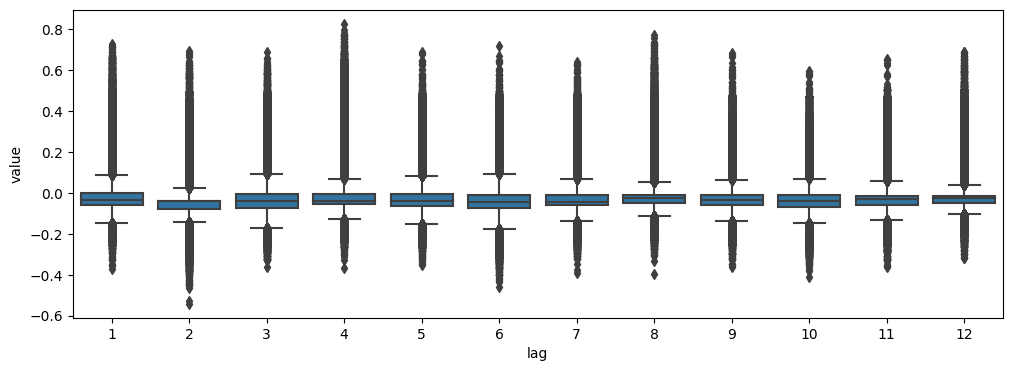

In [71]:
acfs = pvt.apply(lambda x: sm.tsa.acf(x, nlags=12), axis=0)
acfs = pd.melt(acfs, ignore_index=False).reset_index().rename(columns={"index": "lag"})
acfs.drop(acfs[acfs["lag"] == 0].index, axis=0, inplace=True)

fig, ax = plt.subplots(figsize=(12, 4))
sns.boxplot(
    acfs,
    x="lag",
    y="value",
    color=sns.color_palette()[0],
    ax=ax,
    showfliers=True
)
ax.set_title("")
plt.show()

### What about top deforestation regions?

In [106]:
top_1000_deforest_regions = pvt.sum(axis=0).sort_values(ascending=False).index[:100]

c:\Users\GiovanniAmorim\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GiovanniAmorim\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GiovanniAmorim\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


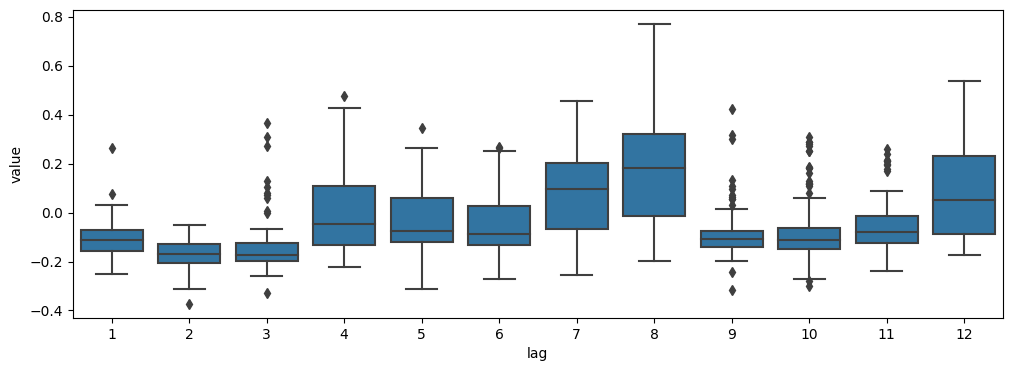

In [107]:
acfs = pvt[top_1000_deforest_regions].apply(lambda x: sm.tsa.acf(x, nlags=12), axis=0)
acfs = pd.melt(acfs, ignore_index=False).reset_index().rename(columns={"index": "lag"})
acfs.drop(acfs[acfs["lag"] == 0].index, axis=0, inplace=True)

fig, ax = plt.subplots(figsize=(12, 4))
sns.boxplot(
    acfs,
    x="lag",
    y="value",
    color=sns.color_palette()[0],
    ax=ax,
    showfliers=True
)
ax.set_title("")
plt.show()

# How big should the network inputs be?

We can answer this by understanding how much of the space around some deforestation area is important to understand (and possibly predict) the deforestation evolution.

In [26]:
s = deforestation.sample()
frames_idx.loc[s["frame_id"].item()]

x              112
y              286
in_borders    True
Name: 87422, dtype: object

In [10]:
region = compute_frames(
    am_bounds.total_bounds, 
    config.BOX_SIDE, 
    500, 600, 
    500, 600
)
region = pd.merge(
    region,
    deforestation,
    on="frame_id",
    how="left"
)

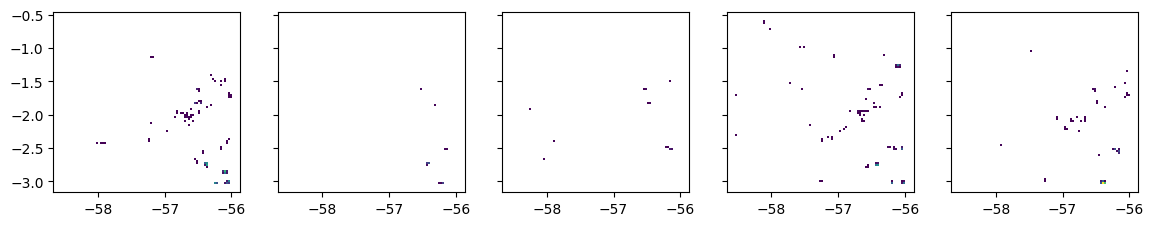

In [14]:
fig, ax = plt.subplots(1, 5, figsize=(14, 8), sharex=True, sharey=True)
for i, dt in enumerate(sorted(region["quarter_date"].dropna().unique())[5:10]):
    dt_region = region[region["quarter_date"] == dt]
    dt_region.plot(column="area", ax=ax[i], vmin=0, vmax=1)
    # am_bounds.boundary.plot(ax=ax[i], color="black")